<script type="text/x-mathjax-config">
MathJax.Hub.Config({
  TeX: { 
    equationNumbers: { autoNumber: "AMS" } 
    }
});
</script>


In [203]:
%%js
MathJax.Hub.Config({
  TeX: { 
    equationNumbers: { autoNumber: "AMS" } 
    }
});


<IPython.core.display.Javascript object>

In [204]:
%pylab inline
# rcParams['figure.figsize'] = [10, 10]
from math import pi
from IPython.display import display, Math,Latex
import pandas as pd


Populating the interactive namespace from numpy and matplotlib


# Моделирование
## Распределение амплитуд

$\renewcommand{\phi}{\varphi}$
Для моделирования случайной поверхности $\Sigma(\vec{r},t)$ используется ее представление в виде суперпозиции плоских волн (гармоник) с различными частотами $\omega_n$ и случайными фазами $\Psi_{nm}$, бегущих под разными азимутальными углами $\phi_m$:
$$\begin{equation*}
    \Sigma(\vec{r},t)=\sum\limits_{n=1}^N\sum_{m=1}^M A_n
    cos(\omega_nt+\vec{k_n}\vec{r}+\Psi_{nm})\cdot\Phi_{nm}
    (\omega_n,\phi_m)
    \label{eq:1}
\end{equation*}$$
Далее будут приведены основные соотношения, необходимые для этого уравнения

$$\begin{equation}
\begin{cases}
	S_{\Sigma}(\omega) = S_{\xi}, & 0< \omega\leq 1.2\omega_m\\
	S_{\Sigma}(\omega) = \frac{\alpha_2}{\omega^4}, 
	& 1.2\omega<\omega \leq a_m\omega_m\\
	S_{\Sigma}(\omega) = \frac{\alpha_3}{\omega^5}, 
	& a_m\omega_m < \omega \leq \omega_{gk}\approx 64 \text{ рад/с}\\
	S_{\Sigma}(\omega) = \frac{\alpha_4}{\omega^2.7}, 
	& \omega_{gk} < \omega \leq \omega_{h}\approx 298 \text{ рад/с}\\
	S_{\Sigma}(\omega) = \frac{\alpha_5}{\omega^5}, 
	& \omega_h<\omega
\end{cases}
\end{equation}$$
Здесь $$\begin{gather}
S_{\xi}(\omega)=\alpha g^2\omega^{-5}\exp\{-1.25(\frac{\omega_m}{\omega})^4\cdot\gamma^r\} \\
r=\exp\left\{-(\omega-\omega_m)^2/(2\sigma_*^2\omega_m^2) \right\}
\end{gather}$$


--спектр JONSWAP.

\begin{equation}
k_m=0.697\cdot \frac{g}{U_{10}^2}
\end{equation}, g-ускорение свободного падения? По размерностям подходит.
Насколько я понимаю, то $\omega_m$ однозначно связана с $k_m$ соотношением 
\begin{equation}
k_m=\frac{\omega_m^2}{g}
\end{equation}

Таким образом, частоту спектрального пика $\omega_m$ мы определяем как:
\begin{equation}
\omega_m^2=0.697\cdot \frac{g^2}{U_{10}^2} .
\end{equation}

In [205]:
global g,omega_gk,omega_h,x__
x__=20170
g=9.81
omega_gk=64
omega_h=298   

def omega_max(U10):
    omega=0.697**(1/2)*g/U10
    return omega

def k_max(U10):
    k_max=0.697*g/U10**2
    return k_max

def omega_k(k):
    return (g*k)**(1/2)

Значение коэффициента $a_m$ зависит от скорости ветра:

In [206]:
def a(U10):
    a=0.371+0.29*U10+0.29/U10
    return a

Коэффициенты $\alpha_i$ вычисляются по следующей формуле:

In [207]:
def alpha0(U10):
    omega_m=omega_max(U10)
    alpha=np.zeros(6)
    alpha[2]=S0(1.2*omega_m,U10)*(1.2*omega_m)**4
    alpha[3]=alpha[2]*a(U10)*omega_m
    alpha[4]=alpha[3]/omega_gk**(2.3)
    alpha[5]=alpha[4]*omega_h**(2.3)
    return alpha

Зададим спектр JONSWAP

Стоит также сказать о коэффициентах $\alpha$ и $\gamma$, входящие в спектр JONSWAP. Они зависят от безразмерного коэффициента разгона $\bar{x} \in [1400,20170]$

А $\sigma_*$, входящее в $r$, задаётся как:

$$\sigma_*=
\begin{cases}
0.07, & \omega\leq\omega_m \\
0.09, & \omega>\omega_m
\end{cases}
$$


In [208]:
def Sigma(omega):
    omega_m=omega_max(U10)
    if omega <= omega_m:
        return 0.07
    else:
        return 0.09

In [209]:
def Alpha(x):
    alpha=array([],dtype='float64')
    alpha=[( 
           +0.0311937
           -0.00232774*log(x)
           -8367.8678786/x**2
#            +4.5114599e+300*exp(-x)*1e+300*1e+17
           +4.5114599e+17*exp(-x)
          )]
    return alpha[0]
def Gamma(x):
    gamma=(
           +5.253660929
           +0.000107622*x
           -0.03778776*sqrt(x)
           -162.9834653/sqrt(x)
           +253251.456472*x**(-3/2)
          )
    return gamma

In [210]:
def S0(k,U10):
    omega=omega_k(k)
    omega_m=omega_max(U10)
    
    def r(omega,omega_m):
        r=(np.exp(-(omega-omega_m)**2/(2*sigma**2*omega_m**2)))
        return r
    
    alpha=Alpha(x__)
#     alpha=0.081
    gamma=Gamma(x__)
#     gamma=3.3
    sigma=Sigma(omega)
    a_m=a(U10)
    S0=( 
        alpha *  g**2 * omega**(-5)
        *exp(-1.25*(omega_m/omega)**4)*
        gamma**r(omega,omega_m)
    )
    return S0

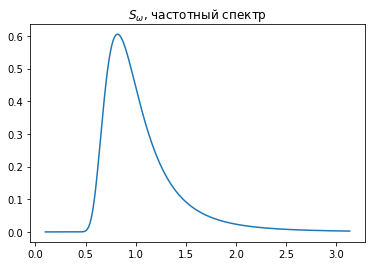

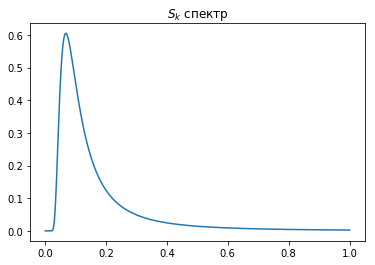

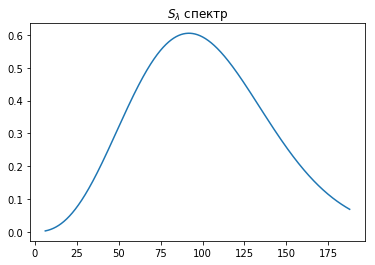

In [211]:
U10=10
y=[]
k=np.linspace(0.001,1,10000)
for i in k:
    y.append(S0(i,U10))
    
plot(sqrt(k*g),y)
title('$S_{\omega}$, частотный спектр')
show()
plot(k,y)
title('$S_k$ спектр')
show()
lam=2*pi/k
y=[y[i] for i in argsort(lam)]
lam=sort(lam)
plot(lam[0:argmax(y)+350],y[0:argmax(y)+350])
title('$S_{\lambda}$ спектр')
show()


In [212]:
def S(k,U10):
    omega=omega_k(k)
    omega_m=omega_max(U10)
 
    alpha=alpha0(U10)
    
    if 0<=omega<=1.2*omega_m:
        S=S0(omega,U10)
    elif 1.2*omega_m<omega<=a(U10)*omega_m:
        S=alpha[2]/omega**4
    elif a(U10)*omega_m<omega<=omega_gk:
        S=alpha[3]/omega**5
    elif omega_gk<omega<=omega_h:
        S=alpha[4]/omega**(2.7)
    elif omega_h<omega:
        S=alpha[5]/omega**5
        
    return S

<script type="text/x-mathjax-config">
MathJax.Hub.Config({
  TeX: { equationNumbers: { autoNumber: "AMS" } }
});
</script>

## Контрольная точка. Проверка спектра амплитуд

### При постоянном X и меняющейся скорости ветра

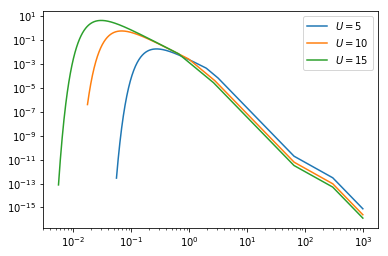

In [213]:
global x__

x__=20170
U10=5
k=logspace(-3.5,5,1000)
C=[]
for i in k:
    C.append(S(i,U10))
loglog(sqrt(k*g),C,label='$U=5$')

U10=10
k=logspace(-4.5,5,1000)
C=[]
for i in k:
    C.append(S(i,U10))
loglog(sqrt(k*g),C,label='$U=10$')

U10=15
k=logspace(-5.5,5,1000)
C=[]
for i in k:
    C.append(S(i,U10))
loglog(sqrt(k*g),C,label='$U=15$')
legend()


### При постоянной скорости и меняющемся X

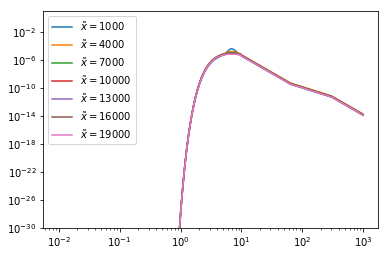

In [223]:
xx=arange(1000,20000,3000)
U10=1
for n in xx:
    x__=n
    k=logspace(-5,5,1000)
    C=[]
    for i in k:
        C.append(S(i,U10))
    loglog(sqrt(k*g),C,label='$\\~{x}=$'+'{0}'.format(x__))

ylim([10**-30,10])

legend()

In [224]:
row1=['$\\alpha$']
row2=['$\\gamma$']
for i in xx:
    row1.append(Alpha(i))
    row2.append(Gamma(i))
    
from ipy_table import*
xx=xx.tolist()
xx.insert(0,'x')
table=[xx,row1,row2]
make_table(table)
# apply_theme('basic')

x,1000,4000,7000,10000,13000,16000,19000
$\alpha$,0.0067,0.0114,0.0104,0.0097,0.0091,0.0086,0.0082
$\gamma$,7.0209,1.7183,1.3299,1.1745,1.0857,1.0324,1.0041


Для сравнения, можно построить график из готовых данных

(1e-15, 10)

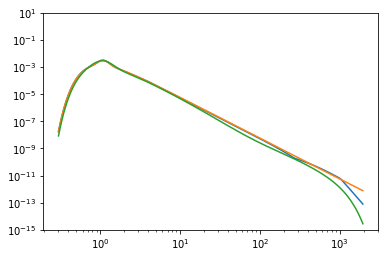

In [216]:
name='SEAWVS_1.dat'
data=pd.read_csv(name,sep='\s+')
loglog(data['KT'],data['OUR'])
loglog(data['KT'],data['JONSWAP'])
loglog(data['KT'],data['ELFOUHAILY'])
ylim([10**-15,10])


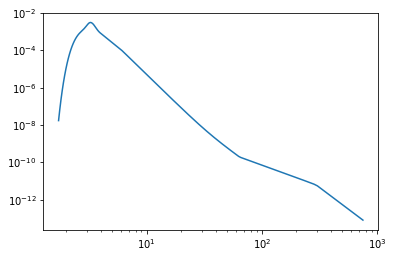

In [217]:
loglog(data['WT'],data['OUR'])

## Угловое распределение
Угловое распределение $\Phi_{\omega}$ описывается следующей формулой:
$$\Phi_{\omega}=A\cdot\frac{2}{\exp(2B\phi)+\exp(-2B\phi)}=\frac{A}{\cosh(2B\phi)},\, -\pi\leq\phi\leq\pi$$
Где $B=10^b$, а b описывается следующей формулой:
$$b=-0.28+0.65\exp\left\{-0.75\log(\frac{k}{k_m})\right\}+0.01\exp\left\{0.2+0.7\lg(\frac{k}{k_m})\right\}$$

<IPython.core.display.Math object>

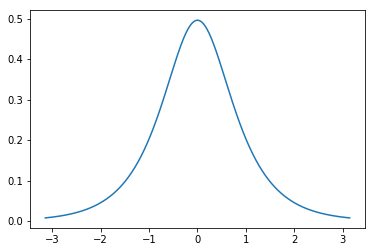

In [218]:

def Phi(phi, omega,U10):
    def B(omega,U10):
        def b(omega, U10):
            k_m=k_max(U10)
            k=omega**2/g
            b=-0.28+0.65*exp(-0.75*log(k/k_m))+0.01*exp(0.2+0.7*log10(k/k_m))            
            return b
        B=10**b(omega,U10)
        return B
    def A(B):
        A=B/arctan(sinh(2*pi*B))
        return A
    
    B=B(omega,U10)
    
    A=A(B)
    Phi=A/cosh(2*B*phi)
    return Phi

x=linspace(-pi,pi,1000)
y=Phi(x,60,10)
plot(x,y)

integral=trapz(y,x,dx=0.1)
display(Math
    (
     r'Интеграл\,функции\,распределения:\\'
     +'\displaystyle\int\limits_{-\pi}^{\pi}'
     +'\Phi_{\omega}(\omega,\phi)d\phi'
     +'={0} \simeq  {1}'.format(integral,round(integral,3)) 
    )
       )

In [219]:
def A(omega,n,U10):
    A=sqrt(2*(n*omega-(n-1)*omega)*S0(omega,U10))
    return A

def Phi0(phi,omega,U10):
    Phi0=sqrt(2*pi/100* Phi(phi,omega,U10) )
    return Phi0

$\Phi_{nm}$ имеет вид:

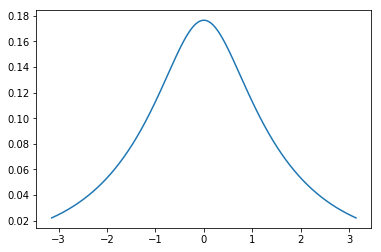

In [220]:
x=linspace(-pi,pi,1000)
y=Phi0(x,60,10)
plot(x,y)

$A_n$ имеет вид:

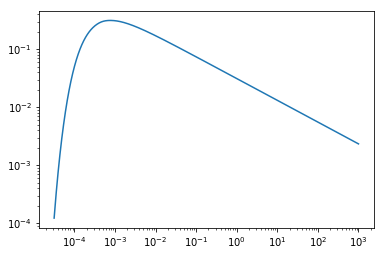

In [221]:
k=logspace(-4.5,3,1000)
omega=omega_k(k)
y=[]
for x in omega:
    y.append(A(x,6,10))
loglog(k,y)

In [222]:
# # %matplotlib qt
# def model(k,U10,t,x,psi):
#     N=int(200*U10)
#     model=0
#     phi=linspace(0,2*pi,100)
#     for j in range(1,N):
#         omega=j*omega_k(k)
# #     for m in range(1,100):
#         model+=(
#                 A(omega,j,U10)*cos(omega*t+x*k*j+psi[j])
# #                 *Phi0(phi[m],omega,U10)
#                )
#     return model

# def psi(U10):
#     N=int(200*U10)
#     psi=zeros(N)
#     for j in range(N):
#         psi[j]=random.uniform(0,2*pi)
#     return psi

# U10=10
# # print(k_max(U10))
# phase=psi(U10)
# # print(phase)

# # x=linspace(0.001,400,1000)
# x=arange(0.01,4,0.01)

# Model=zeros(len(x))
# t=10
# for i in range(1,len(x)):
#     Model[i]=(model(1,U10,0,x[i],phase))
# plot(x[0:-1],Model[0:-1])
# show()

# dispersion=std(Model)
# mn=mean(Model)
# med=median(Model)
# print('Дисперсия=',dispersion)
# print('Среднее=',mn)
# print('Медианное значение=',med)